<a href="https://colab.research.google.com/github/data-better/DeepS/blob/master/%EA%B5%90%EC%9E%AC_10%EC%9E%A5_CIFAR_10_%EC%A0%84%EC%9D%B4%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 전이학습 : ResNet 모형을 이용한 분류 


In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import datasets, models, Model, optimizers
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D, GlobalAveragePooling2D,BatchNormalization, UpSampling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

94773248/94765736 [==============================] - 2s 0us/step


In [ ]:
cifar10 = datasets.cifar10
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
train_x, test_x = train_x / 255.0, test_x / 255.0

#train_y = to_categorical(train_y, 10)
#test_y  = to_categorical(test_y, 10)

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
print('train: x=%s, y=%s' % (train_x.shape, train_y.shape))
print('test : x=%s, y=%s' % (test_x.shape,  test_y.shape))

train: x=(50000, 32, 32, 3), y=(50000, 1)
test : x=(10000, 32, 32, 3), y=(10000, 1)


In [ ]:
for layer in conv_base.layers:
     layer.trainable = True
     
model_t = models.Sequential([
  UpSampling2D((2,2),input_shape=(32,32,3)),
  UpSampling2D((2,2)),
  UpSampling2D((2,2)),
  conv_base,
  Flatten(),
  BatchNormalization(),
  Dense(128, activation='relu'),
#  Dropout(0.3),
  BatchNormalization(),
  Dense(64, activation='relu'),
#  Dropout(0.3),
  BatchNormalization(),
  Dense(10, activation='softmax')
])
model_t.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d (UpSampling2D) (None, 64, 64, 3)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 128, 128, 3)       0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 256, 256, 3)       0         
_________________________________________________________________
resnet50 (Model)             multiple                  23587712  
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 131072)            524288    
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [ ]:
model_t.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#hist_t = model_t.fit(train_x, train_y, epochs=10, batch_size=64, validation_data=(test_x, test_y))
hist_t = model_t.fit(train_x, train_y, epochs=20, batch_size=64, validation_split = 0.25)

Epoch 1/20
586/586 [==============================] - 264s 450ms/step - loss: 0.8123 - accuracy: 0.7233 - val_loss: 3.5750 - val_accuracy: 0.1022
Epoch 2/20
586/586 [==============================] - 261s 446ms/step - loss: 0.4860 - accuracy: 0.8340 - val_loss: 0.8381 - val_accuracy: 0.7251
Epoch 3/20
586/586 [==============================] - 261s 446ms/step - loss: 0.3400 - accuracy: 0.8821 - val_loss: 0.7006 - val_accuracy: 0.7720
Epoch 4/20
586/586 [==============================] - 261s 445ms/step - loss: 0.2541 - accuracy: 0.9130 - val_loss: 0.7126 - val_accuracy: 0.7792
Epoch 5/20
586/586 [==============================] - 261s 445ms/step - loss: 0.2000 - accuracy: 0.9315 - val_loss: 0.6755 - val_accuracy: 0.7902
Epoch 6/20
586/586 [==============================] - 261s 445ms/step - loss: 0.1720 - accuracy: 0.9405 - val_loss: 0.6892 - val_accuracy: 0.8018
Epoch 7/20
586/586 [==============================] - 261s 445ms/step - loss: 0.1296 - accuracy: 0.9553 - val_loss: 0.6922 -

In [ ]:
sc = model_t.evaluate(test_x, test_y)
print("accuracy : ", sc[1], "  loss : ", sc[0])

313/313 [==============================] - 22s 70ms/step - loss: 0.9402 - accuracy: 0.7931
accuracy :  0.7930999994277954   loss :  0.9401963949203491


In [ ]:
for layer in conv_base.layers:
     layer.trainable = False
#hist_t = model_t.fit(train_x, train_y, epochs=10, batch_size=64, validation_data=(test_x, test_y))
hist_t1 = model_t.fit(train_x, train_y, epochs=10, batch_size=64, validation_split = 0.25)

Epoch 1/10
586/586 [==============================] - 262s 447ms/step - loss: 0.0459 - accuracy: 0.9849 - val_loss: 0.7377 - val_accuracy: 0.8260
Epoch 2/10
586/586 [==============================] - 262s 447ms/step - loss: 0.0339 - accuracy: 0.9889 - val_loss: 0.6743 - val_accuracy: 0.8482
Epoch 3/10
586/586 [==============================] - 262s 447ms/step - loss: 0.0324 - accuracy: 0.9894 - val_loss: 0.7689 - val_accuracy: 0.8350
Epoch 4/10
586/586 [==============================] - 262s 447ms/step - loss: 0.0370 - accuracy: 0.9874 - val_loss: 0.8054 - val_accuracy: 0.8225
Epoch 5/10
586/586 [==============================] - 262s 447ms/step - loss: 0.0362 - accuracy: 0.9876 - val_loss: 0.6823 - val_accuracy: 0.8530
Epoch 6/10
586/586 [==============================] - 262s 447ms/step - loss: 0.0259 - accuracy: 0.9915 - val_loss: 0.9179 - val_accuracy: 0.8165
Epoch 7/10
586/586 [==============================] - 262s 447ms/step - loss: 0.0331 - accuracy: 0.9884 - val_loss: 0.7782 -

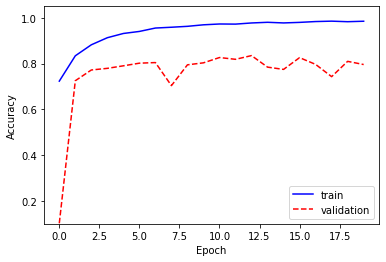

In [ ]:
plt.plot(hist_t.history['accuracy'], 'b-')
plt.plot(hist_t.history['val_accuracy'], 'r--')
plt.legend(['train', 'validation'], loc='lower right')
plt.ylim([0.1,1.05])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
sc = model_t.evaluate(test_x, test_y)
print("accuracy : ", sc[1], "  loss : ", sc[0])

313/313 [==============================] - 22s 70ms/step - loss: 0.5745 - accuracy: 0.8318
accuracy :  0.8317999839782715   loss :  0.5744982957839966


In [ ]:
for layer in conv_base.layers:
     layer.trainable = False
model_ts = models.Sequential([
  UpSampling2D((2,2),input_shape=(32,32,3)),
  UpSampling2D((2,2)),
  UpSampling2D((2,2)),
  conv_base,
  Flatten(),
  BatchNormalization(),
  Dense(128, activation='relu'),
  Dropout(0.5),
  BatchNormalization(),
  Dense(10, activation='softmax')
])
model_ts.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d_3 (UpSampling2 (None, 64, 64, 3)         0         
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 128, 128, 3)       0         
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 256, 256, 3)       0         
_________________________________________________________________
resnet50 (Model)             multiple                  23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 131072)            524288    
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [ ]:
model_ts.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_ts = model_ts.fit(train_x, train_y, epochs=10, batch_size=256, validation_split=0.25)

Epoch 1/10
147/147 [==============================] - 98s 667ms/step - loss: 0.3524 - accuracy: 0.8924 - val_loss: 0.3811 - val_accuracy: 0.8780
Epoch 2/10
147/147 [==============================] - 96s 650ms/step - loss: 0.0956 - accuracy: 0.9753 - val_loss: 0.3827 - val_accuracy: 0.8818
Epoch 3/10
147/147 [==============================] - 95s 650ms/step - loss: 0.0402 - accuracy: 0.9921 - val_loss: 0.4023 - val_accuracy: 0.8834
Epoch 4/10
147/147 [==============================] - 95s 650ms/step - loss: 0.0220 - accuracy: 0.9962 - val_loss: 0.4355 - val_accuracy: 0.8788
Epoch 5/10
147/147 [==============================] - 96s 650ms/step - loss: 0.0139 - accuracy: 0.9980 - val_loss: 0.4523 - val_accuracy: 0.8831
Epoch 6/10
147/147 [==============================] - 95s 650ms/step - loss: 0.0091 - accuracy: 0.9990 - val_loss: 0.4709 - val_accuracy: 0.8809
Epoch 7/10
147/147 [==============================] - 96s 650ms/step - loss: 0.0088 - accuracy: 0.9984 - val_loss: 0.4875 - val_ac

In [ ]:
sc1 = model_ts.evaluate(test_x, test_y)
print("accuracy : ", sc1[1], "  loss : ", sc1[0])

313/313 [==============================] - 22s 69ms/step - loss: 0.5796 - accuracy: 0.8702
accuracy :  0.870199978351593   loss :  0.5795707702636719


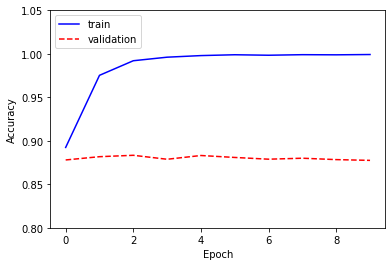

In [ ]:
plt.plot(hist_ts.history['accuracy'], 'b-')
plt.plot(hist_ts.history['val_accuracy'], 'r--')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim([0.8,1.05])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
model_ts.save('model_ts.h5')

In [ ]:
for layer in conv_base.layers:
     layer.trainable = False

model_tsf = models.Sequential([
  UpSampling2D((2,2),input_shape=(32,32,3)),
  UpSampling2D((2,2)),
  UpSampling2D((2,2)),
  conv_base,
  Flatten(),
  BatchNormalization(),
  Dense(256, activation='relu'),
  BatchNormalization(),
  Dense(10, activation='softmax')
])
model_tsf.summary()     

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d_12 (UpSampling (None, 64, 64, 3)         0         
_________________________________________________________________
up_sampling2d_13 (UpSampling (None, 128, 128, 3)       0         
_________________________________________________________________
up_sampling2d_14 (UpSampling (None, 256, 256, 3)       0         
_________________________________________________________________
resnet50 (Model)             multiple                  23587712  
_________________________________________________________________
flatten_4 (Flatten)          (None, 131072)            0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 131072)            524288    
_________________________________________________________________
dense_9 (Dense)              (None, 256)              

In [ ]:
model_tsf.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_tsf = model_tsf.fit(train_x, train_y, epochs=25, batch_size=256, validation_split=0.25)

Epoch 1/25
147/147 [==============================] - 97s 659ms/step - loss: 1.5455 - accuracy: 0.4927 - val_loss: 3.2506 - val_accuracy: 0.2075
Epoch 2/25
147/147 [==============================] - 96s 653ms/step - loss: 1.1156 - accuracy: 0.6115 - val_loss: 1.5677 - val_accuracy: 0.4508
Epoch 3/25
147/147 [==============================] - 96s 653ms/step - loss: 0.9603 - accuracy: 0.6661 - val_loss: 1.2194 - val_accuracy: 0.5626
Epoch 4/25
147/147 [==============================] - 96s 653ms/step - loss: 0.8425 - accuracy: 0.7061 - val_loss: 1.0843 - val_accuracy: 0.6203
Epoch 5/25
147/147 [==============================] - 96s 653ms/step - loss: 0.7315 - accuracy: 0.7460 - val_loss: 1.0933 - val_accuracy: 0.6269
Epoch 6/25
147/147 [==============================] - 96s 653ms/step - loss: 0.6412 - accuracy: 0.7827 - val_loss: 1.1033 - val_accuracy: 0.6361
Epoch 7/25
147/147 [==============================] - 96s 653ms/step - loss: 0.5574 - accuracy: 0.8105 - val_loss: 1.1031 - val_ac

In [ ]:
model_tsf.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_tsf = model_tsf.fit(train_x, train_y, epochs=25, batch_size=256, validation_split=0.25)

Epoch 1/25
147/147 [==============================] - 97s 659ms/step - loss: 0.1011 - accuracy: 0.9681 - val_loss: 1.9109 - val_accuracy: 0.6319
Epoch 2/25
147/147 [==============================] - 96s 653ms/step - loss: 0.0924 - accuracy: 0.9698 - val_loss: 1.8004 - val_accuracy: 0.6224
Epoch 3/25
147/147 [==============================] - ETA: 0s - loss: 0.0720 - accuracy: 0.9774

In [ ]:
plt.plot(hist_tsf.history['accuracy'], 'b-')
plt.plot(hist_tsf.history['val_accuracy'], 'r--')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0.90,0.95])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

NameError: ignored

In [ ]:
model_tsf.save('model_tsf.h5')

In [ ]:
cifar10 = datasets.cifar10
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
train_x, test_x = train_x / 255.0, test_x / 255.0

model_ts.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
for layer in conv_base.layers:
     layer.trainable = False
hist_ts = model_ts.fit(train_x, train_y, epochs=5, batch_size=64, validation_data=(test_x, test_y))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 135s 3ms/sample - loss: 52.8760 - accuracy: 0.5107 - val_loss: 17.1735 - val_accuracy: 0.4725
Epoch 2/5
50000/50000 [==============================] - 131s 3ms/sample - loss: 29.9811 - accuracy: 0.5192 - val_loss: 15.1989 - val_accuracy: 0.4787
Epoch 3/5
50000/50000 [==============================] - 131s 3ms/sample - loss: 27.8712 - accuracy: 0.5221 - val_loss: 15.4295 - val_accuracy: 0.4702
Epoch 4/5
50000/50000 [==============================] - 131s 3ms/sample - loss: 28.7911 - accuracy: 0.5240 - val_loss: 15.1992 - val_accuracy: 0.4883
Epoch 5/5
50000/50000 [==============================] - 131s 3ms/sample - loss: 28.5866 - accuracy: 0.5275 - val_loss: 15.7449 - val_accuracy: 0.4815


In [ ]:
for layer in conv_base.layers:
     layer.trainable = True

model_t.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
hist_t1 = model_t.fit(train_x, train_y, epochs=7, batch_size=64, validation_data=(test_x, test_y))     

Train on 50000 samples, validate on 10000 samples
Epoch 1/7
50000/50000 [==============================] - 351s 7ms/sample - loss: 0.4088 - accuracy: 0.8874 - val_loss: 0.3222 - val_accuracy: 0.9000
Epoch 2/7
50000/50000 [==============================] - 340s 7ms/sample - loss: 0.3098 - accuracy: 0.8988 - val_loss: 0.2898 - val_accuracy: 0.9000
Epoch 3/7
50000/50000 [==============================] - 340s 7ms/sample - loss: 0.2895 - accuracy: 0.8997 - val_loss: 0.2797 - val_accuracy: 0.8995
Epoch 4/7
50000/50000 [==============================] - 340s 7ms/sample - loss: 0.2897 - accuracy: 0.9000 - val_loss: 0.2821 - val_accuracy: 0.8999
Epoch 5/7
50000/50000 [==============================] - 340s 7ms/sample - loss: 0.2856 - accuracy: 0.8999 - val_loss: 0.2918 - val_accuracy: 0.8997
Epoch 6/7
50000/50000 [==============================] - 340s 7ms/sample - loss: 0.2807 - accuracy: 0.8999 - val_loss: 0.3711 - val_accuracy: 0.8973
Epoch 7/7
50000/50000 [==============================] -

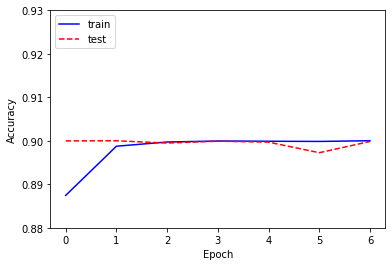

In [ ]:
plt.plot(hist_t1.history['accuracy'], 'b-')
plt.plot(hist_t1.history['val_accuracy'], 'r--')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0.88,0.93])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
model_t.evaluate(test_x, test_y)

10000/10000 [==============================] - 93s 9ms/sample - loss: 0.9510 - acc: 0.6885


[0.9510027439117431, 0.6885]

In [ ]:
model = models.Sequential()
model.add(UpSampling2D((2,2),input_shape=(32,32,3)))
model.add(UpSampling2D((2,2)))
model.add(UpSampling2D((2,2)))
model.add(conv_base)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d_13 (UpSampling (None, 64, 64, 3)         0         
_________________________________________________________________
up_sampling2d_14 (UpSampling (None, 128, 128, 3)       0         
_________________________________________________________________
up_sampling2d_15 (UpSampling (None, 256, 256, 3)       0         
_________________________________________________________________
resnet50 (Model)             multiple                  23587712  
_________________________________________________________________
flatten_4 (Flatten)          (None, 131072)            0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 131072)            524288    
_________________________________________________________________
dense_12 (Dense)             (None, 128)              

In [ ]:
#model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_x, train_y, epochs=3, batch_size=40, validation_data=(test_x, test_y))

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 146s 3ms/sample - loss: 1.1465 - accuracy: 0.6159 - val_loss: 2.7441 - val_accuracy: 0.1001
Epoch 2/3
17880/50000 [=========>....................] - ETA: 1:17 - loss: 0.7382 - accuracy: 0.7576

KeyboardInterrupt: ignored

In [ ]:
model.save('my_model.h5')
# del model
model = tf.keras.models.load_model('my_model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 86s 9ms/sample - loss: 0.1134 - acc: 0.9589


[0.11341218554973602, 0.95888007]

In [ ]:
model.summary()

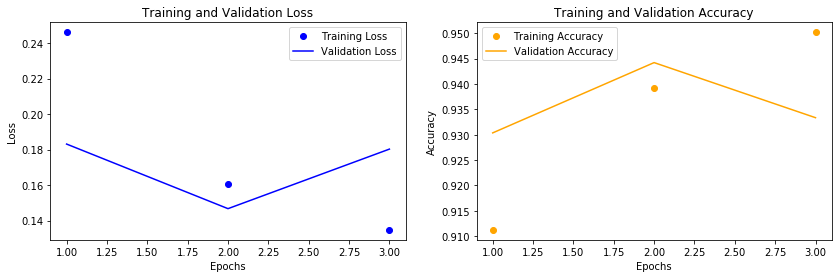

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'bo', label='Training Accuracy', c='orange')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy', c='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

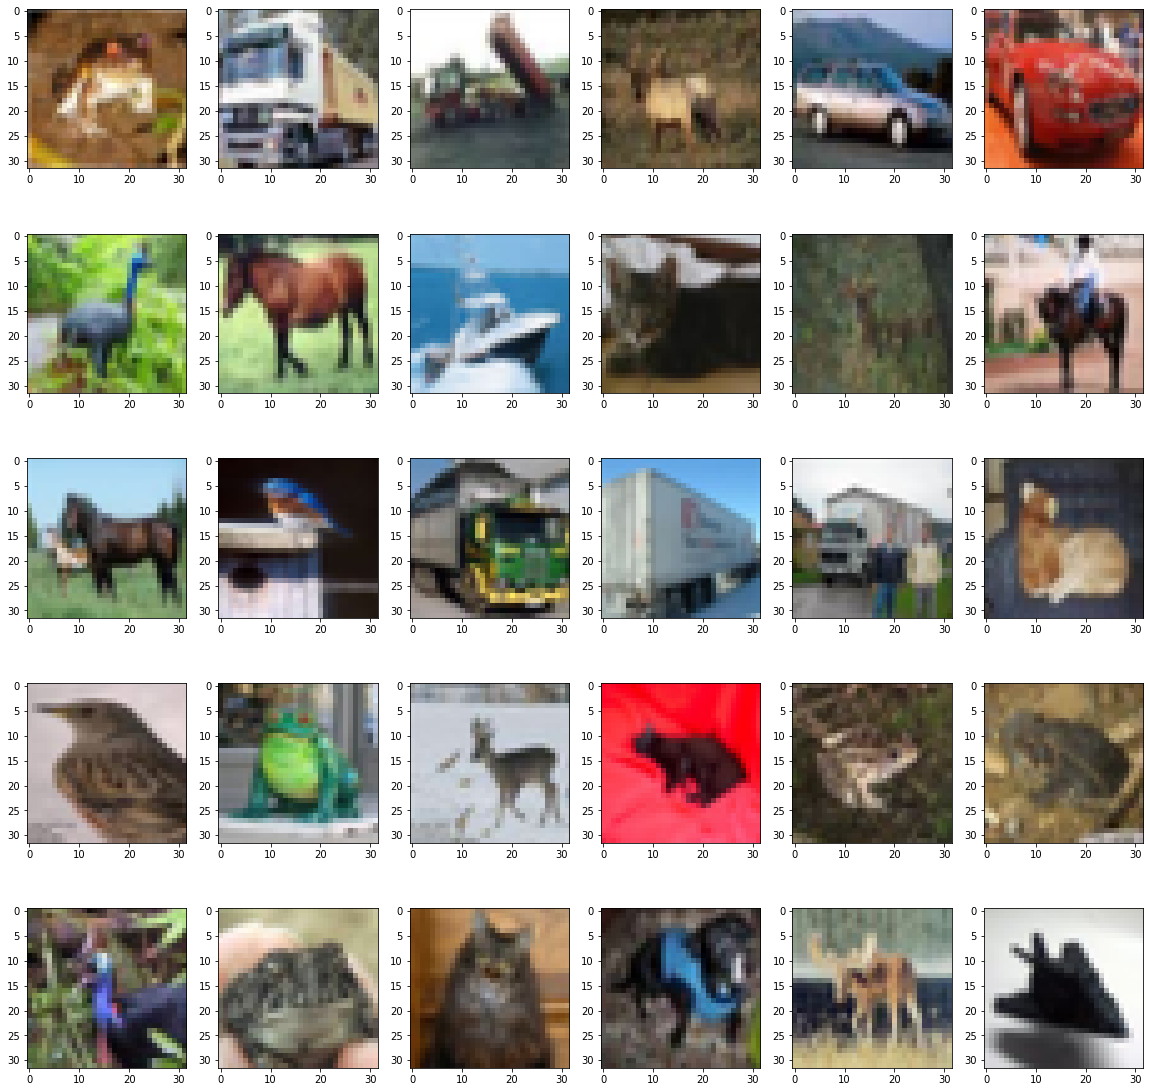

In [ ]:
plt.figure(figsize=(20,20))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.imshow(x_train[i])

In [ ]:
layer_outputs = [layer.output for layer in conv_base.layers[2:8]]

activation_model = models.Model(inputs=conv_base.input, outputs=layer_outputs)

In [ ]:
img = x_train[30]
# img = Image.fromarray(img, 'RGB')
# img.save('outfile.jpg')
# cv2.imwrite('myImage.png',img)

# img = image.load_img('outfile.jpg', target_size=(200, 200))
# img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img, axis=0)
img_tensor /= 255.

In [ ]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]

ValueError: ignored

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 5], cmap='viridis')
plt.show()

In [ ]:
plt.figure()
plt.imshow(x_train[30])

In [ ]:
for layer in base_model.layers:
     layer.trainable = False
prediction_layer = Dense(10, activation='softmax')
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  batch_normal_layer,
  dense_layer_1,
  prediction_layer
])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_10  (None, 512)               0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
dense_25 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_30 (Dense)             (None, 10)                2570      
Total params: 14,850,634
Trainable params: 134,922
Non-trainable params: 14,715,712
_________________________________________________________________


In [ ]:
for layer in base_model.layers:
     layer.trainable = False

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
histt = model.fit(train_x2, train_y, epochs=25, batch_size=256
                , validation_data=(test_x2, test_y))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 10s 199us/sample - loss: 1.3538 - accuracy: 0.5360 - val_loss: 1.3716 - val_accuracy: 0.5377
Epoch 2/25
50000/50000 [==============================] - 9s 181us/sample - loss: 1.0746 - accuracy: 0.6284 - val_loss: 1.1327 - val_accuracy: 0.6010
Epoch 3/25
50000/50000 [==============================] - 9s 180us/sample - loss: 0.9797 - accuracy: 0.6623 - val_loss: 1.0853 - val_accuracy: 0.6244
Epoch 4/25
50000/50000 [==============================] - 9s 181us/sample - loss: 0.9136 - accuracy: 0.6840 - val_loss: 1.0939 - val_accuracy: 0.6274
Epoch 5/25
50000/50000 [==============================] - 9s 181us/sample - loss: 0.8551 - accuracy: 0.7045 - val_loss: 1.0954 - val_accuracy: 0.6267
Epoch 6/25
50000/50000 [==============================] - 9s 181us/sample - loss: 0.8004 - accuracy: 0.7253 - val_loss: 1.0947 - val_accuracy: 0.6290
Epoch 7/25
50000/50000 [=========================

In [ ]:
# load image
filename = '/dog_2.jpg'
img = load_img(filename, target_size=(224, 224))
# convert to array, reshape, preprocessing
img = img_to_array(img)
img = img.reshape(1, 224, 224, 3)
img = preprocess_input(img)
result = model.predict(img)
print(decode_predictions(result, top=3)[0])

[('n02109047', 'Great_Dane', 0.9308192), ('n02093428', 'American_Staffordshire_terrier', 0.022158109), ('n02108089', 'boxer', 0.01323102)]
